<a href="https://colab.research.google.com/github/RitikaSen27/IDEAS-TIH-INTERNSHIP/blob/main/Breast_cancer_clustering_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset shape: (569, 31)

Columns: ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry', 'mean fractal dimension', 'radius error', 'texture error', 'perimeter error', 'area error', 'smoothness error', 'compactness error', 'concavity error', 'concave points error', 'symmetry error', 'fractal dimension error', 'worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst smoothness', 'worst compactness', 'worst concavity', 'worst concave points', 'worst symmetry', 'worst fractal dimension', 'target']

First 5 rows:
    mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1    

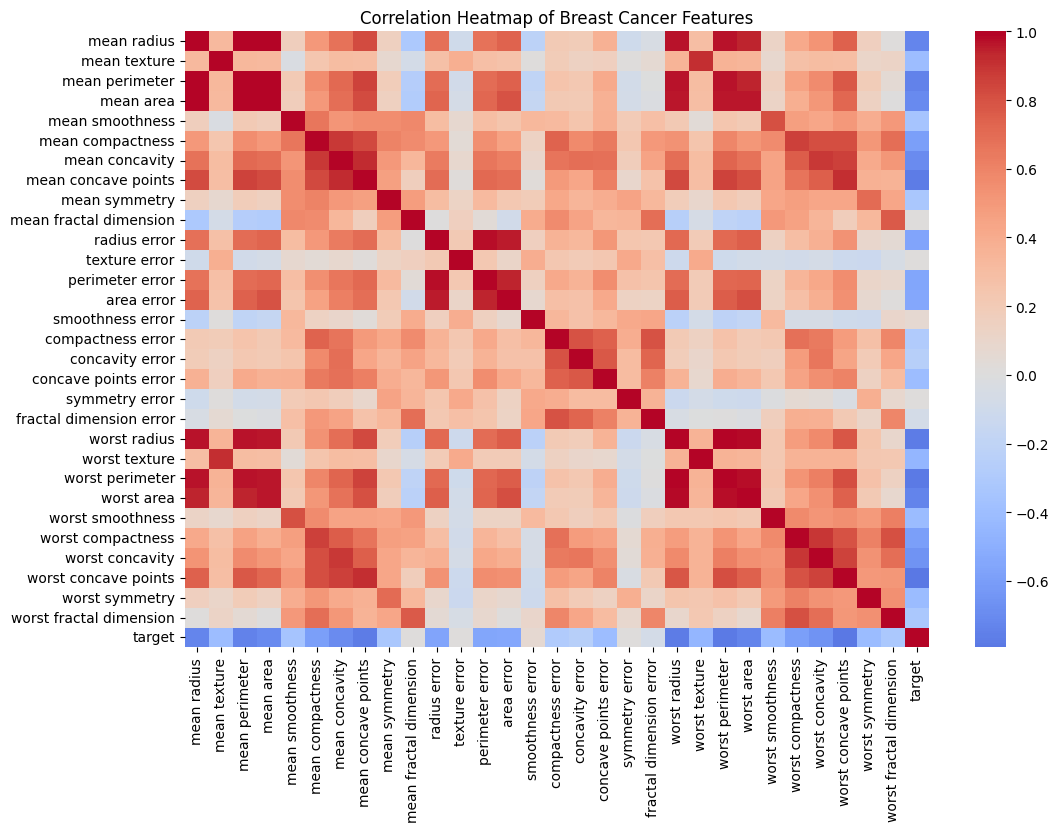

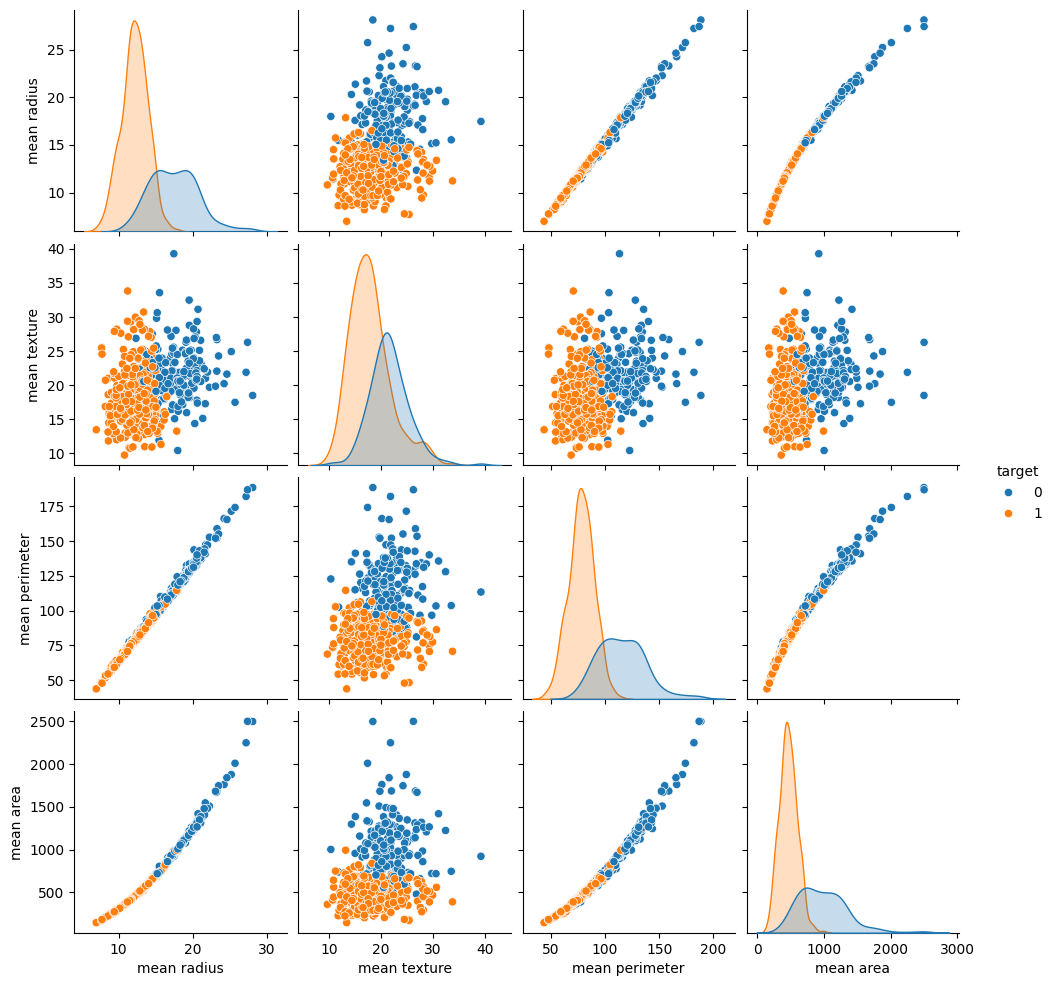

In [1]:
# Step 1: Load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer

# Step 2: Load dataset
cancer = load_breast_cancer()

# Convert to pandas DataFrame
data = pd.DataFrame(cancer.data, columns=cancer.feature_names)
data['target'] = cancer.target

# Step 3: Basic EDA
print("Dataset shape:", data.shape)
print("\nColumns:", data.columns.tolist())
print("\nFirst 5 rows:\n", data.head())
print("\nTarget names:", cancer.target_names)
print("\nClass distribution:\n", data['target'].value_counts())

# Step 4: Descriptive statistics
print("\nSummary statistics:\n", data.describe())

# Step 5: Correlation heatmap (high-dimensional insight)
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), cmap="coolwarm", center=0)
plt.title("Correlation Heatmap of Breast Cancer Features")
plt.show()

# Step 6: Pairplot (just a subset of features to avoid overcrowding)
sns.pairplot(data[['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'target']],
             hue='target', diag_kind='kde')
plt.show()


Silhouette Score: 0.508


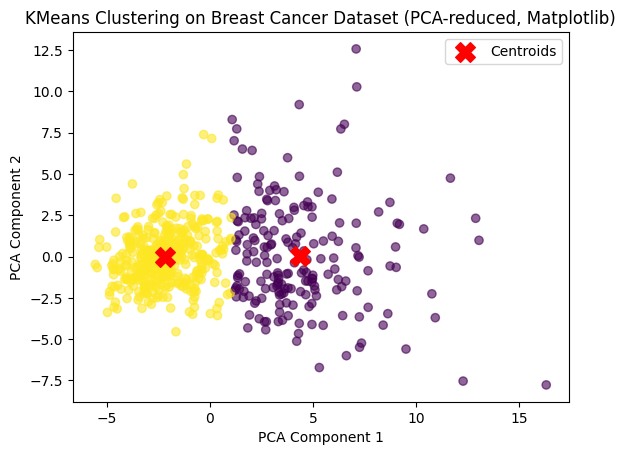

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

class BreastCancerClustering:
    def __init__(self, n_clusters=2):
        self.n_clusters = n_clusters
        self.data = None
        self.labels = None
        self.kmeans = None
        self.scaled_data = None
        self.reduced_data = None

    def load_data(self):
        """Load the Breast Cancer dataset"""
        cancer = load_breast_cancer()
        self.data = cancer.data
        return self.data

    def preprocess_data(self):
        """Standardize + PCA dimensionality reduction"""
        scaler = StandardScaler()
        self.scaled_data = scaler.fit_transform(self.data)

        # PCA to 2D for visualization
        pca = PCA(n_components=2)
        self.reduced_data = pca.fit_transform(self.scaled_data)

        return self.reduced_data

    def apply_kmeans(self):
        """Apply KMeans clustering"""
        self.kmeans = KMeans(n_clusters=self.n_clusters, random_state=42, n_init=10)
        self.labels = self.kmeans.fit_predict(self.reduced_data)
        return self.labels

    def evaluate_clusters(self):
        """Compute silhouette score"""
        score = silhouette_score(self.reduced_data, self.labels)
        print(f"Silhouette Score: {score:.3f}")
        return score

    def visualize_clusters_matplotlib(self):
        """Visualize clustering result using Matplotlib"""
        plt.scatter(self.reduced_data[:, 0], self.reduced_data[:, 1],
                    c=self.labels, cmap='viridis', alpha=0.6)
        plt.title("KMeans Clustering on Breast Cancer Dataset (PCA-reduced, Matplotlib)")
        plt.xlabel("PCA Component 1")
        plt.ylabel("PCA Component 2")

        # Plot centroids
        centroids = self.kmeans.cluster_centers_
        plt.scatter(centroids[:, 0], centroids[:, 1],
                    c='red', marker='X', s=200, label='Centroids')
        plt.legend()
        plt.show()

    def visualize_clusters_opencv(self):
        """Visualize clustering result using OpenCV"""
        canvas = np.ones((600, 600, 3), dtype=np.uint8) * 255
        colors = [(255, 0, 0), (0, 255, 0), (0, 0, 255)]
        scaled = (self.reduced_data * 100 + 300).astype(int)

        for i, point in enumerate(scaled):
            cv2.circle(canvas, tuple(point), 3, colors[self.labels[i] % 3], -1)

        cv2.imshow("KMeans Clustering (OpenCV)", canvas)
        cv2.waitKey(0)
        cv2.destroyAllWindows()


# --- Run the full process ---
if __name__ == "__main__":
    clustering = BreastCancerClustering(n_clusters=2)
    clustering.load_data()
    clustering.preprocess_data()
    clustering.apply_kmeans()
    clustering.evaluate_clusters()
    clustering.visualize_clusters_matplotlib()
    # Uncomment if using OpenCV locally
    # clustering.visualize_clusters_opencv()
